In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
from sklearn.model_selection import train_test_split

In [2]:
traindata = np.loadtxt('data/STATE_DATA.csv', delimiter=',',skiprows=1)

In [3]:

NUM_CLASSES=4
NUM_CHANNELS=5
SEQ_LENGTH=50
CLASSES = [0,1,2,3]

In [4]:
# STANDARDISE
# for i in range(NUM_CHANNELS):
#     traindata[:,i]=traindata[:,i]-traindata[:,i].mean()
#     traindata[:,i]=traindata[:,i]/traindata[:,i].std()

In [5]:

xdata = []
ydata = []
for i in range(NUM_CLASSES):
    classdata = traindata[traindata[:,-1]==i]
    N = classdata.shape[0]//SEQ_LENGTH
    for j in range(N):
        xdata.append(classdata[j*SEQ_LENGTH:(j+1)*SEQ_LENGTH,:-1,None])
        ydata.append(i)

xdata = np.array(xdata)
ydata = np.array(ydata)

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata,ydata,test_size=0.1,random_state=12)

In [7]:
model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(4, (3,5),padding="valid", activation="relu", input_shape=(SEQ_LENGTH,5,1)),  # output_shape=(batch, 128, 3, 8)
      tf.keras.layers.MaxPool2D((2,1)),  # (batch, 42, 1, 8)
      #tf.keras.layers.Dropout(0.1),  # (batch, 42, 1, 8)
      tf.keras.layers.Conv2D(4, (3,1), padding="same",activation="relu"),  # (batch, 42, 1, 16)
      tf.keras.layers.MaxPool2D((2,1), padding="same"),  # (batch, 14, 1, 16)
      tf.keras.layers.Conv2D(4, (3,1), padding="same",activation="relu"),  # (batch, 42, 1, 16)
      tf.keras.layers.MaxPool2D((2,1), padding="same"),  # (batch, 14, 1, 16)
      #tf.keras.layers.Dropout(0.1),  # (batch, 14, 1, 16)
      tf.keras.layers.Flatten(),  # (batch, 224)
      tf.keras.layers.Dense(8, activation="relu"),  # (batch, 16)
      #tf.keras.layers.Dropout(0.1),  # (batch, 16)
      tf.keras.layers.Dense(4, activation="softmax")  # (batch, 4)
  ])

2022-05-11 09:15:22.147894: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-11 09:15:22.866795: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14805 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0001:00:00.0, compute capability: 7.5


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 1, 4)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 1, 4)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 1, 4)          52        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 1, 4)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 1, 4)          52        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 1, 4)           0         
_________________________________________________________________
flatten (Flatten)            (None, 24)                0

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [12]:
print("Fit model on training data")
history = model.fit(
    xtrain,
    ytrain,
    batch_size=32,
    epochs=2000,
    verbose=0,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(xtest, ytest),
)

Fit model on training data


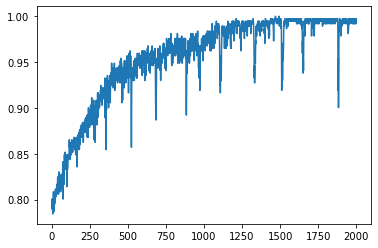

In [16]:
plt.plot(history.history['sparse_categorical_accuracy'])

In [12]:
model.predict(xtest)

array([[0.28654975, 0.71342933, 0.00001462, 0.0000063 ],
       [0.1973469 , 0.8026231 , 0.00002302, 0.00000698],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.1522137 , 0.8477653 , 0.00001751, 0.00000356],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.79126793, 0.20872559, 0.00000568, 0.00000085],
       [0.1930338 , 0.8069513 , 0.00001164, 0.00000323],
       [0.30038956, 0.69532764, 0.00423783, 0.00004502],
       [0.00072648, 0.24097534, 0.65517735, 0.10312077],
       [0.16907553, 0.83089375, 0.00002433, 0.00000634],
       [1.        , 0.        , 0.        , 0.        ],
       [0.00000068, 0.003495  , 0.24400672, 0.7524976 ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.15873952, 0.8412558 , 0.00000368, 0.00000101],
       [0.15127306, 0.84871095, 0.0000113 , 0.00000472],
       [1.        , 0.        ,

In [13]:
ytest

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 3, 0, 1, 1, 0, 0, 0, 2, 0,
       1, 0, 0, 2, 3, 0, 0, 1, 2, 1, 3, 2, 1, 0, 2, 2, 3, 3, 2, 0])

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("model.tflite", "wb").write(tflite_model)

2022-05-11 09:15:45.348865: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpje6mmngq/assets


2022-05-11 09:15:45.778177: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-05-11 09:15:45.778262: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-05-11 09:15:45.779947: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14805 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0001:00:00.0, compute capability: 7.5
2022-05-11 09:15:45.780671: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1137] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.004ms.
  function_optimizer: function_optimizer did nothing. time = 0ms.

2022-05-11 09:15:45.809397: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2022-05-11 09:15:45.809429: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.

5432

In [16]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i model.tflite > /content/model.cc
# Print the source file
!cat /content/model.cc

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
/bin/bash: /content/model.cc: No such file or directory
cat: /content/model.cc: No such file or directory


In [ ]:
unsigned char model_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x00, 0x00, 0x2c, 0x00, 0x00, 0x00, 0xe8, 0x00, 0x00, 0x00,
  0x2c, 0x00, 0x00, 0x00, 0x90, 0x00, 0x00, 0x00, 0x88, 0x00, 0x00, 0x00,
  0x05, 0x00, 0x00, 0x00, 0x28, 0x09, 0x00, 0x00, 0x44, 0x08, 0x00, 0x00,
  0xd4, 0x03, 0x00, 0x00, 0x10, 0x03, 0x00, 0x00, 0xd4, 0x01, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0xe0, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00,
  0xd4, 0x14, 0x00, 0x00, 0xd0, 0x14, 0x00, 0x00, 0xf4, 0x13, 0x00, 0x00,
  0x60, 0x13, 0x00, 0x00, 0xd8, 0x12, 0x00, 0x00, 0x60, 0x12, 0x00, 0x00,
  0xe8, 0x11, 0x00, 0x00, 0x70, 0x11, 0x00, 0x00, 0x20, 0x0e, 0x00, 0x00,
  0x4c, 0x0d, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0xe4, 0x0a, 0x00, 0x00,
  0xc8, 0x09, 0x00, 0x00, 0xa0, 0x14, 0x00, 0x00, 0x9c, 0x14, 0x00, 0x00,
  0x98, 0x14, 0x00, 0x00, 0x94, 0x14, 0x00, 0x00, 0x90, 0x14, 0x00, 0x00,
  0x8c, 0x14, 0x00, 0x00, 0x88, 0x14, 0x00, 0x00, 0x84, 0x14, 0x00, 0x00,
  0x80, 0x14, 0x00, 0x00, 0x7c, 0x14, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x0c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x00, 0x00, 0x17, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00,
  0x6d, 0x69, 0x6e, 0x5f, 0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f,
  0x76, 0x65, 0x72, 0x73, 0x69, 0x6f, 0x6e, 0x00, 0xa2, 0xec, 0xff, 0xff,
  0x04, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x31, 0x2e, 0x35, 0x2e,
  0x30, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x4d, 0x4c, 0x49, 0x52, 0x20, 0x43, 0x6f, 0x6e,
  0x76, 0x65, 0x72, 0x74, 0x65, 0x64, 0x2e, 0x00, 0x00, 0x00, 0x0e, 0x00,
  0x18, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00,
  0x0e, 0x00, 0x00, 0x00, 0x14, 0x00, 0x00, 0x00, 0x6c, 0x00, 0x00, 0x00,
  0x70, 0x00, 0x00, 0x00, 0x74, 0x00, 0x00, 0x00, 0x9c, 0x00, 0x00, 0x00,
  0x16, 0x00, 0x00, 0x00, 0x84, 0x13, 0x00, 0x00, 0x28, 0x13, 0x00, 0x00,
  0x9c, 0x12, 0x00, 0x00, 0x14, 0x12, 0x00, 0x00, 0x8c, 0x11, 0x00, 0x00,
  0x14, 0x11, 0x00, 0x00, 0x9c, 0x10, 0x00, 0x00, 0x3c, 0x10, 0x00, 0x00,
  0xe8, 0x0c, 0x00, 0x00, 0x0c, 0x0c, 0x00, 0x00, 0xc0, 0x0a, 0x00, 0x00,
  0xa4, 0x09, 0x00, 0x00, 0xf4, 0x07, 0x00, 0x00, 0x10, 0x07, 0x00, 0x00,
  0xb4, 0x05, 0x00, 0x00, 0xfc, 0x04, 0x00, 0x00, 0xe0, 0x03, 0x00, 0x00,
  0x34, 0x03, 0x00, 0x00, 0x90, 0x02, 0x00, 0x00, 0xcc, 0x01, 0x00, 0x00,
  0x08, 0x01, 0x00, 0x00, 0x8c, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x15, 0x00, 0x00, 0x00,
  0x0a, 0x00, 0x00, 0x00, 0x54, 0x07, 0x00, 0x00, 0x74, 0x06, 0x00, 0x00,
  0x30, 0x05, 0x00, 0x00, 0x74, 0x04, 0x00, 0x00, 0x68, 0x03, 0x00, 0x00,
  0xbc, 0x02, 0x00, 0x00, 0x20, 0x02, 0x00, 0x00, 0x40, 0x01, 0x00, 0x00,
  0x98, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x6d, 0x61, 0x69, 0x6e, 0x00, 0x00, 0x00, 0x00, 0x72, 0xfd, 0xff, 0xff,
  0x00, 0x00, 0x00, 0x09, 0x04, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x10, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0xb6, 0xed, 0xff, 0xff,
  0x00, 0x00, 0x80, 0x3f, 0x01, 0x00, 0x00, 0x00, 0x15, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x14, 0x00, 0x00, 0x00, 0xc8, 0xf8, 0xff, 0xff,
  0x19, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x19, 0x01, 0x00, 0x00, 0x00,
  0x70, 0xed, 0xff, 0xff, 0x14, 0x00, 0x00, 0x00, 0x16, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x00, 0x00, 0x30, 0x00, 0x00, 0x00, 0x20, 0x00, 0x00, 0x00,
  0x02, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x00, 0x00, 0x49, 0x64, 0x65, 0x6e, 0x74, 0x69, 0x74, 0x79,
  0x00, 0x00, 0x00, 0x00, 0x02, 0x00, 0x00, 0x00, 0xff, 0xff, 0xff, 0xff,
  0x04, 0x00, 0x00, 0x00, 0x44, 0xed, 0xff, 0xff, 0xf6, 0xfd, 0xff, 0xff,
  0x00, 0x00, 0x00, 0x08, 0x03, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x60, 0xed, 0xff, 0xff,
  0x01, 0x00, 0x00, 0x00, 0x14, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x13, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00, 0x02, 0x00, 0x00, 0x00,
  0xe8, 0xed, 0xff, 0xff, 0x14, 0x00, 0x00, 0x00, 0x15, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x00, 0x00, 0x5c, 0x00, 0x00, 0x00, 0x4c, 0x00, 0x00, 0x00,
  0x02, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x34, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69,
  0x61, 0x6c, 0x2f, 0x64, 0x65, 0x6e, 0x73, 0x65, 0x5f, 0x31, 0x2f, 0x4d,
  0x61, 0x74, 0x4d, 0x75, 0x6c, 0x3b, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e,
  0x74, 0x69, 0x61, 0x6c, 0x2f, 0x64, 0x65, 0x6e, 0x73, 0x65, 0x5f, 0x31,
  0x2f, 0x42, 0x69, 0x61, 0x73, 0x41, 0x64, 0x64, 0x00, 0x00, 0x00, 0x00,
  0x02, 0x00, 0x00, 0x00, 0xff, 0xff, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00,
  0xe8, 0xed, 0xff, 0xff, 0xf2, 0xfa, 0xff, 0xff, 0x00, 0x00, 0x00, 0x08,
  0x03, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x00, 0x00, 0x06, 0x00, 0x08, 0x00, 0x07, 0x00,
  0x06, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x01, 0x01, 0x00, 0x00, 0x00,
  0x13, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x12, 0x00, 0x00, 0x00,
  0x07, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x00, 0xfa, 0xff, 0xff,
  0x09, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x09, 0x01, 0x00, 0x00, 0x00,
  0xa8, 0xee, 0xff, 0xff, 0x14, 0x00, 0x00, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x00, 0x00, 0x6c, 0x00, 0x00, 0x00, 0x5c, 0x00, 0x00, 0x00,
  0x02, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x46, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69,
  0x61, 0x6c, 0x2f, 0x64, 0x65, 0x6e, 0x73, 0x65, 0x2f, 0x4d, 0x61, 0x74,
  0x4d, 0x75, 0x6c, 0x3b, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69,
  0x61, 0x6c, 0x2f, 0x64, 0x65, 0x6e, 0x73, 0x65, 0x2f, 0x52, 0x65, 0x6c,
  0x75, 0x3b, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c,
  0x2f, 0x64, 0x65, 0x6e, 0x73, 0x65, 0x2f, 0x42, 0x69, 0x61, 0x73, 0x41,
  0x64, 0x64, 0x00, 0x00, 0x02, 0x00, 0x00, 0x00, 0xff, 0xff, 0xff, 0xff,
  0x08, 0x00, 0x00, 0x00, 0x9c, 0xef, 0xff, 0xff, 0x00, 0x00, 0x0a, 0x00,
  0x10, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x0a, 0x00, 0x00, 0x00,
  0x02, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x12, 0x00, 0x00, 0x00, 0x02, 0x00, 0x00, 0x00,
  0x11, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0xc0, 0xfa, 0xff, 0xff,
  0x16, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x16, 0x01, 0x00, 0x00, 0x00,
  0x68, 0xef, 0xff, 0xff, 0x14, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x00, 0x00, 0x40, 0x00, 0x00, 0x00, 0x30, 0x00, 0x00, 0x00,
  0x02, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00,
  0x1a, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69,
  0x61, 0x6c, 0x2f, 0x66, 0x6c, 0x61, 0x74, 0x74, 0x65, 0x6e, 0x2f, 0x52,
  0x65, 0x73, 0x68, 0x61, 0x70, 0x65, 0x00, 0x00, 0x02, 0x00, 0x00, 0x00,
  0xff, 0xff, 0xff, 0xff, 0x18, 0x00, 0x00, 0x00, 0x30, 0xf0, 0xff, 0xff,
  0x00, 0x00, 0x0e, 0x00, 0x18, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00,
  0x07, 0x00, 0x14, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x05,
  0x01, 0x00, 0x00, 0x00, 0x28, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x4e, 0xfe, 0xff, 0xff, 0x02, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x02, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x11, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x10, 0x00, 0x00, 0x00, 0x08, 0xf0, 0xff, 0xff, 0x14, 0x00, 0x00, 0x00,
  0x12, 0x00, 0x00, 0x00, 0x20, 0x00, 0x00, 0x00, 0x58, 0x00, 0x00, 0x00,
  0x40, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x06, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x22, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69,
  0x61, 0x6c, 0x2f, 0x6d, 0x61, 0x78, 0x5f, 0x70, 0x6f, 0x6f, 0x6c, 0x69,
  0x6e, 0x67, 0x32, 0x64, 0x5f, 0x32, 0x2f, 0x4d, 0x61, 0x78, 0x50, 0x6f,
  0x6f, 0x6c, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0xff, 0xff, 0xff, 0xff,
  0x06, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x04, 0xf0, 0xff, 0xff, 0x32, 0xfc, 0xff, 0xff, 0x00, 0x00, 0x00, 0x01,
  0x24, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x40, 0xfe, 0xff, 0xff, 0x01, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x01, 0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x0b, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0xb0, 0xf0, 0xff, 0xff, 0x14, 0x00, 0x00, 0x00,
  0x11, 0x00, 0x00, 0x00, 0x20, 0x00, 0x00, 0x00, 0xb8, 0x00, 0x00, 0x00,
  0xa0, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x83, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69,
  0x61, 0x6c, 0x2f, 0x63, 0x6f, 0x6e, 0x76, 0x32, 0x64, 0x5f, 0x32, 0x2f,
  0x52, 0x65, 0x6c, 0x75, 0x3b, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74,
  0x69, 0x61, 0x6c, 0x2f, 0x63, 0x6f, 0x6e, 0x76, 0x32, 0x64, 0x5f, 0x32,
  0x2f, 0x42, 0x69, 0x61, 0x73, 0x41, 0x64, 0x64, 0x3b, 0x73, 0x65, 0x71,
  0x75, 0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x63, 0x6f, 0x6e, 0x76,
  0x32, 0x64, 0x5f, 0x32, 0x2f, 0x43, 0x6f, 0x6e, 0x76, 0x32, 0x44, 0x3b,
  0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x63,
  0x6f, 0x6e, 0x76, 0x32, 0x64, 0x5f, 0x32, 0x2f, 0x42, 0x69, 0x61, 0x73,
  0x41, 0x64, 0x64, 0x2f, 0x52, 0x65, 0x61, 0x64, 0x56, 0x61, 0x72, 0x69,
  0x61, 0x62, 0x6c, 0x65, 0x4f, 0x70, 0x2f, 0x72, 0x65, 0x73, 0x6f, 0x75,
  0x72, 0x63, 0x65, 0x00, 0x04, 0x00, 0x00, 0x00, 0xff, 0xff, 0xff, 0xff,
  0x0c, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x0c, 0xf1, 0xff, 0xff, 0x16, 0xfe, 0xff, 0xff, 0x00, 0x00, 0x00, 0x05,
  0x01, 0x00, 0x00, 0x00, 0x38, 0x00, 0x00, 0x00, 0x2c, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0e, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 0x0e, 0x00, 0x00, 0x00,
  0x02, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x02, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x0e, 0x00, 0x00, 0x00, 0xc8, 0xf1, 0xff, 0xff,
  0x14, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x20, 0x00, 0x00, 0x00,
  0x58, 0x00, 0x00, 0x00, 0x40, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x22, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75,
  0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x6d, 0x61, 0x78, 0x5f, 0x70,
  0x6f, 0x6f, 0x6c, 0x69, 0x6e, 0x67, 0x32, 0x64, 0x5f, 0x31, 0x2f, 0x4d,
  0x61, 0x78, 0x50, 0x6f, 0x6f, 0x6c, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xff, 0xff, 0xff, 0xff, 0x0c, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0xc4, 0xf1, 0xff, 0xff, 0xf2, 0xfd, 0xff, 0xff,
  0x00, 0x00, 0x00, 0x01, 0x30, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00,
  0x10, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x00, 0x00, 0x04, 0x00,
  0x08, 0x00, 0x0f, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x01, 0x01, 0x00, 0x00, 0x00,
  0x0e, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x0d, 0x00, 0x00, 0x00,
  0x0a, 0x00, 0x00, 0x00, 0x05, 0x00, 0x00, 0x00, 0x7c, 0xf2, 0xff, 0xff,
  0x14, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x20, 0x00, 0x00, 0x00,
  0xd4, 0x00, 0x00, 0x00, 0xbc, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x9e, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75,
  0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x63, 0x6f, 0x6e, 0x76, 0x32,
  0x64, 0x5f, 0x31, 0x2f, 0x52, 0x65, 0x6c, 0x75, 0x3b, 0x73, 0x65, 0x71,
  0x75, 0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x63, 0x6f, 0x6e, 0x76,
  0x32, 0x64, 0x5f, 0x31, 0x2f, 0x42, 0x69, 0x61, 0x73, 0x41, 0x64, 0x64,
  0x3b, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f,
  0x63, 0x6f, 0x6e, 0x76, 0x32, 0x64, 0x5f, 0x32, 0x2f, 0x43, 0x6f, 0x6e,
  0x76, 0x32, 0x44, 0x3b, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69,
  0x61, 0x6c, 0x2f, 0x63, 0x6f, 0x6e, 0x76, 0x32, 0x64, 0x5f, 0x31, 0x2f,
  0x43, 0x6f, 0x6e, 0x76, 0x32, 0x44, 0x3b, 0x73, 0x65, 0x71, 0x75, 0x65,
  0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x63, 0x6f, 0x6e, 0x76, 0x32, 0x64,
  0x5f, 0x31, 0x2f, 0x42, 0x69, 0x61, 0x73, 0x41, 0x64, 0x64, 0x2f, 0x52,
  0x65, 0x61, 0x64, 0x56, 0x61, 0x72, 0x69, 0x61, 0x62, 0x6c, 0x65, 0x4f,
  0x70, 0x2f, 0x72, 0x65, 0x73, 0x6f, 0x75, 0x72, 0x63, 0x65, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0xff, 0xff, 0xff, 0xff, 0x18, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0xd8, 0xf3, 0xff, 0xff,
  0x00, 0x00, 0x0e, 0x00, 0x1a, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00,
  0x07, 0x00, 0x14, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x05,
  0x01, 0x00, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00, 0x30, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0e, 0x00, 0x18, 0x00, 0x17, 0x00,
  0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 0x0e, 0x00, 0x00, 0x00,
  0x02, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x02, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x01, 0x01, 0x00, 0x00, 0x00,
  0x0d, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x2c, 0xff, 0xff, 0xff, 0x11, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x11,
  0x01, 0x00, 0x00, 0x00, 0xd4, 0xf3, 0xff, 0xff, 0x14, 0x00, 0x00, 0x00,
  0x0e, 0x00, 0x00, 0x00, 0x20, 0x00, 0x00, 0x00, 0x58, 0x00, 0x00, 0x00,
  0x40, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x20, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69,
  0x61, 0x6c, 0x2f, 0x6d, 0x61, 0x78, 0x5f, 0x70, 0x6f, 0x6f, 0x6c, 0x69,
  0x6e, 0x67, 0x32, 0x64, 0x2f, 0x4d, 0x61, 0x78, 0x50, 0x6f, 0x6f, 0x6c,
  0x00, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0xff, 0xff, 0xff, 0xff,
  0x18, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xb4, 0xf4, 0xff, 0xff, 0x00, 0x00, 0x0e, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x0c, 0x00, 0x07, 0x00, 0x10, 0x00, 0x0e, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x01, 0x30, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00,
  0x10, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x0e, 0x00, 0x04, 0x00,
  0x08, 0x00, 0x0f, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x00, 0x00, 0x01, 0x01, 0x01, 0x00, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00,
  0x09, 0x00, 0x00, 0x00, 0x06, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x10, 0x00,
  0x0b, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x04, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x03, 0x01, 0x00, 0x00, 0x00,
  0xb4, 0xf4, 0xff, 0xff, 0x14, 0x00, 0x00, 0x00, 0x0d, 0x00, 0x00, 0x00,
  0x20, 0x00, 0x00, 0x00, 0xcc, 0x00, 0x00, 0x00, 0xb4, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x30, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x96, 0x00, 0x00, 0x00,
  0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x63,
  0x6f, 0x6e, 0x76, 0x32, 0x64, 0x2f, 0x52, 0x65, 0x6c, 0x75, 0x3b, 0x73,
  0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x63, 0x6f,
  0x6e, 0x76, 0x32, 0x64, 0x2f, 0x42, 0x69, 0x61, 0x73, 0x41, 0x64, 0x64,
  0x3b, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f,
  0x63, 0x6f, 0x6e, 0x76, 0x32, 0x64, 0x5f, 0x32, 0x2f, 0x43, 0x6f, 0x6e,
  0x76, 0x32, 0x44, 0x3b, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69,
  0x61, 0x6c, 0x2f, 0x63, 0x6f, 0x6e, 0x76, 0x32, 0x64, 0x2f, 0x43, 0x6f,
  0x6e, 0x76, 0x32, 0x44, 0x3b, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74,
  0x69, 0x61, 0x6c, 0x2f, 0x63, 0x6f, 0x6e, 0x76, 0x32, 0x64, 0x2f, 0x42,
  0x69, 0x61, 0x73, 0x41, 0x64, 0x64, 0x2f, 0x52, 0x65, 0x61, 0x64, 0x56,
  0x61, 0x72, 0x69, 0x61, 0x62, 0x6c, 0x65, 0x4f, 0x70, 0x2f, 0x72, 0x65,
  0x73, 0x6f, 0x75, 0x72, 0x63, 0x65, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xff, 0xff, 0xff, 0xff, 0x30, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x24, 0xf5, 0xff, 0xff, 0x02, 0xf6, 0xff, 0xff,
  0x04, 0x00, 0x00, 0x00, 0xc0, 0x00, 0x00, 0x00, 0xbb, 0xa5, 0x28, 0x3d,
  0xe0, 0xe1, 0x20, 0x3f, 0xd1, 0x5f, 0x21, 0x3f, 0x5a, 0x1e, 0x30, 0xbf,
  0x1b, 0x48, 0x2d, 0xbe, 0x2e, 0x0f, 0x0b, 0xbf, 0x73, 0xe8, 0x14, 0xbe,
  0x28, 0xbe, 0x84, 0xbe, 0xd8, 0x2e, 0x8a, 0xbf, 0xc6, 0xdc, 0xab, 0x3e,
  0x8c, 0xbb, 0x1c, 0x3f, 0xe3, 0x1e, 0x38, 0x3e, 0x34, 0x99, 0x0f, 0x3f,
  0x4f, 0x73, 0xb2, 0xbe, 0xa9, 0xb7, 0x3b, 0x3e, 0xe9, 0xe3, 0x2c, 0x3f,
  0x02, 0x2e, 0xeb, 0x3e, 0xfe, 0xa7, 0x10, 0x3f, 0x9b, 0xb0, 0x15, 0xbe,
  0xb7, 0xe5, 0x41, 0x3e, 0x92, 0xd7, 0x61, 0xbe, 0x1a, 0xaa, 0x11, 0x3f,
  0xe3, 0xcb, 0x87, 0x3e, 0xd6, 0x09, 0x03, 0xbe, 0x20, 0xcd, 0x83, 0xbe,
  0xe4, 0x89, 0x7f, 0x3d, 0x79, 0xa3, 0x4c, 0x3e, 0x89, 0xed, 0x9d, 0x3e,
  0x67, 0xee, 0x4b, 0x3f, 0x52, 0x84, 0xcf, 0x3c, 0x58, 0x93, 0x63, 0xbe,
  0x3b, 0x0d, 0xae, 0x3e, 0xf8, 0x5c, 0x86, 0xbf, 0xe6, 0x39, 0xc2, 0xbe,
  0xe2, 0x4a, 0x49, 0x3d, 0x40, 0x06, 0x0b, 0x3f, 0xdc, 0x67, 0x3d, 0x3f,
  0xf8, 0x79, 0x20, 0x3f, 0xd5, 0xf6, 0x85, 0x3e, 0xbf, 0x5b, 0x9e, 0x3e,
  0xa6, 0x45, 0x95, 0x3e, 0x9d, 0x9a, 0x23, 0x3e, 0x96, 0xd8, 0x35, 0xbe,
  0x94, 0xa1, 0x0b, 0xbe, 0xee, 0x45, 0x90, 0xbc, 0x79, 0x54, 0x51, 0xbe,
  0x96, 0xa2, 0xea, 0xbe, 0xeb, 0x2e, 0xa0, 0x3e, 0x3a, 0xf7, 0xff, 0xff,
  0x10, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x38, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x1a, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69,
  0x61, 0x6c, 0x2f, 0x63, 0x6f, 0x6e, 0x76, 0x32, 0x64, 0x5f, 0x32, 0x2f,
  0x43, 0x6f, 0x6e, 0x76, 0x32, 0x44, 0x00, 0x00, 0x3c, 0xf6, 0xff, 0xff,
  0x1a, 0xf7, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00, 0xc0, 0x00, 0x00, 0x00,
  0xc6, 0x79, 0xa2, 0xbe, 0xce, 0x90, 0x49, 0x3d, 0x76, 0x11, 0x73, 0x3f,
  0x30, 0x98, 0x09, 0xbf, 0x08, 0xbc, 0xc4, 0xbd, 0x2b, 0x7b, 0x4e, 0x3f,
  0xc3, 0xac, 0xdb, 0xbe, 0xad, 0xb7, 0x0e, 0x3e, 0x7b, 0xcb, 0x1c, 0x3f,
  0x30, 0xe7, 0x85, 0x3e, 0x4d, 0x61, 0x73, 0xbc, 0x52, 0x2a, 0xa4, 0x3d,
  0x1b, 0xc1, 0x4c, 0xbc, 0x3d, 0x77, 0xa8, 0xbe, 0x5d, 0x11, 0x30, 0xbf,
  0x12, 0x1a, 0xe3, 0x3e, 0x43, 0x83, 0x91, 0xbe, 0x83, 0x89, 0x23, 0x3f,
  0x27, 0x12, 0x9a, 0xbe, 0xc2, 0xc6, 0xac, 0xbe, 0x09, 0x08, 0x27, 0x3f,
  0xba, 0x5c, 0xa7, 0x3e, 0x3f, 0x4b, 0x28, 0xbc, 0xb1, 0x86, 0xc5, 0xbe,
  0x6c, 0x11, 0x35, 0x3f, 0xa9, 0xc0, 0x1f, 0xbf, 0x4c, 0xf6, 0x81, 0x3e,
  0x26, 0xf8, 0x1f, 0x3f, 0x2b, 0xcd, 0xc2, 0xbd, 0xeb, 0x3b, 0xdc, 0x3b,
  0x47, 0xd9, 0x09, 0x3f, 0x5a, 0x4d, 0xf0, 0x3e, 0xf9, 0x7e, 0x08, 0x3f,
  0xe7, 0xa8, 0x1f, 0x3e, 0xf5, 0x3a, 0x00, 0x3f, 0x69, 0x9d, 0xca, 0xbe,
  0x43, 0xd1, 0x45, 0x3f, 0x1e, 0x13, 0x50, 0x3e, 0xae, 0x53, 0x9c, 0xbe,
  0x08, 0xdf, 0x15, 0x3d, 0xfd, 0xff, 0xed, 0x3d, 0xf5, 0x38, 0x87, 0x3e,
  0x5a, 0x5e, 0xde, 0xbe, 0x2b, 0x47, 0xd1, 0xbe, 0xf9, 0x6d, 0xb7, 0x3d,
  0xdc, 0xfd, 0xaa, 0x3e, 0x88, 0xf4, 0xc2, 0x3d, 0x8f, 0x3b, 0x63, 0x3e,
  0x52, 0xf8, 0xff, 0xff, 0x10, 0x00, 0x00, 0x00, 0x0b, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x38, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x1a, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75,
  0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x63, 0x6f, 0x6e, 0x76, 0x32,
  0x64, 0x5f, 0x31, 0x2f, 0x43, 0x6f, 0x6e, 0x76, 0x32, 0x44, 0x00, 0x00,
  0x54, 0xf7, 0xff, 0xff, 0x32, 0xf8, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00,
  0xf0, 0x00, 0x00, 0x00, 0xaa, 0x4b, 0x01, 0x3e, 0xa8, 0xd6, 0x2f, 0x3e,
  0x21, 0xd6, 0x10, 0x3e, 0xd2, 0x79, 0x4d, 0xbe, 0x3d, 0x33, 0x4f, 0xbe,
  0x9d, 0x6c, 0x73, 0xbe, 0xd9, 0xb3, 0x83, 0xbe, 0xc9, 0x66, 0x09, 0xbf,
  0x63, 0x12, 0x7f, 0x3e, 0x15, 0xb5, 0xee, 0x3e, 0xee, 0x3a, 0xfc, 0x3d,
  0xe7, 0x9e, 0x8d, 0x3e, 0x49, 0xb5, 0x09, 0xbf, 0xca, 0x4d, 0x68, 0xbe,
  0x0e, 0xa1, 0xcd, 0xbe, 0xdb, 0xf8, 0xa9, 0x3e, 0x8b, 0xe1, 0x48, 0x3d,
  0x9d, 0xbf, 0x3d, 0x3f, 0xdb, 0xf6, 0x24, 0x3f, 0xd9, 0xb1, 0x98, 0xbe,
  0xc2, 0xaa, 0xf1, 0x3d, 0xa4, 0xa4, 0x7e, 0x3d, 0x04, 0xf8, 0xb1, 0x3d,
  0xba, 0xdc, 0xae, 0xbe, 0xa8, 0x95, 0x00, 0x3f, 0x3e, 0xe2, 0x04, 0x3e,
  0xf2, 0x1b, 0x09, 0xbe, 0x23, 0x90, 0x6a, 0x3e, 0xeb, 0x7b, 0x02, 0xbf,
  0x22, 0xae, 0x35, 0x3e, 0xf1, 0xd1, 0xe8, 0xbe, 0x3a, 0xf0, 0xb2, 0x3e,
  0xd4, 0x45, 0x3c, 0xbf, 0x7f, 0x57, 0xc0, 0xbc, 0x2b, 0xe5, 0xff, 0x3d,
  0xe6, 0x11, 0xb5, 0xbd, 0x96, 0x3f, 0x4e, 0x3e, 0xed, 0x4a, 0x95, 0x3e,
  0x7c, 0x8c, 0x1d, 0x3f, 0xc2, 0x69, 0xb2, 0x3e, 0x70, 0x6c, 0xb6, 0xbd,
  0x77, 0xd7, 0x91, 0xbe, 0x2f, 0x73, 0x11, 0xbe, 0x5c, 0x10, 0x40, 0x3f,
  0x2f, 0x86, 0x1a, 0x3d, 0xb9, 0x52, 0xd7, 0xbe, 0x46, 0xf1, 0x45, 0x3e,
  0x28, 0x04, 0xba, 0xbd, 0x73, 0x34, 0x94, 0x3d, 0x67, 0x06, 0x2b, 0x3e,
  0xa7, 0xe8, 0x87, 0xbe, 0x64, 0xb6, 0x60, 0x3e, 0xec, 0x1b, 0xcd, 0xbd,
  0x6d, 0xf6, 0x2f, 0xbf, 0xbb, 0x00, 0x52, 0xbe, 0x55, 0x57, 0x0c, 0x3e,
  0xd1, 0x19, 0x4c, 0x3e, 0x0b, 0xf2, 0x51, 0xbc, 0x15, 0x0e, 0x1a, 0x3e,
  0x90, 0x34, 0x02, 0x3e, 0x9a, 0xf9, 0xff, 0xff, 0x10, 0x00, 0x00, 0x00,
  0x0a, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x38, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x05, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00,
  0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x63,
  0x6f, 0x6e, 0x76, 0x32, 0x64, 0x2f, 0x43, 0x6f, 0x6e, 0x76, 0x32, 0x44,
  0x00, 0x00, 0x00, 0x00, 0x9c, 0xf8, 0xff, 0xff, 0x7a, 0xf9, 0xff, 0xff,
  0x04, 0x00, 0x00, 0x00, 0x80, 0x00, 0x00, 0x00, 0x0c, 0x8f, 0xe0, 0xbe,
  0x19, 0x93, 0x14, 0x3f, 0xce, 0xe2, 0x98, 0x3f, 0x1a, 0xf1, 0x91, 0x3e,
  0x28, 0xfa, 0x51, 0x3e, 0xa8, 0x02, 0x40, 0x3f, 0xc1, 0x72, 0xb5, 0xbf,
  0xe4, 0x3f, 0x3b, 0x3f, 0x40, 0xb3, 0xdc, 0x3e, 0xac, 0x55, 0xff, 0x3e,
  0xa9, 0xb3, 0xd7, 0xbf, 0x1b, 0xf0, 0x24, 0x3f, 0x2a, 0xa5, 0x12, 0xbf,
  0x68, 0xc3, 0x2c, 0x3d, 0xfe, 0x30, 0x93, 0x3e, 0x12, 0x9a, 0x2a, 0x3f,
  0x6a, 0x17, 0x93, 0xbe, 0xcc, 0x72, 0x24, 0xbe, 0x52, 0x54, 0x19, 0xbf,
  0xb5, 0xbe, 0x2a, 0xbf, 0xa8, 0xfe, 0x1f, 0x3f, 0x86, 0x49, 0xc4, 0xbc,
  0xbb, 0x24, 0x3b, 0x3f, 0xc4, 0xcc, 0xf9, 0x3c, 0xe1, 0x5a, 0xb5, 0xbd,
  0x8f, 0xc4, 0x83, 0xbe, 0x7a, 0x55, 0xe9, 0x3e, 0xe6, 0x97, 0x88, 0xbe,
  0x25, 0x44, 0x78, 0xbf, 0x4c, 0xdf, 0x77, 0xbf, 0x84, 0xf7, 0xa4, 0x3e,
  0x44, 0x2d, 0x10, 0x3f, 0x72, 0xfa, 0xff, 0xff, 0x10, 0x00, 0x00, 0x00,
  0x09, 0x00, 0x00, 0x00, 0x14, 0x00, 0x00, 0x00, 0x30, 0x00, 0x00, 0x00,
  0x02, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x19, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69,
  0x61, 0x6c, 0x2f, 0x64, 0x65, 0x6e, 0x73, 0x65, 0x5f, 0x31, 0x2f, 0x4d,
  0x61, 0x74, 0x4d, 0x75, 0x6c, 0x00, 0x00, 0x00, 0x6c, 0xf9, 0xff, 0xff,
  0x4a, 0xfa, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00,
  0xcb, 0x31, 0x49, 0xbe, 0x0a, 0x40, 0x5c, 0xbe, 0x0e, 0xd3, 0x83, 0x3e,
  0x9d, 0xe2, 0x3c, 0x3d, 0xa1, 0x3c, 0xb8, 0x3e, 0x9d, 0xbc, 0x0d, 0x3e,
  0x55, 0x02, 0x83, 0x3d, 0xa6, 0xe8, 0x89, 0x3e, 0x5b, 0x61, 0x96, 0xbe,
  0xdc, 0x75, 0x28, 0x3d, 0x77, 0x19, 0x4a, 0xbd, 0x49, 0xed, 0xd5, 0xbe,
  0x51, 0x85, 0xdb, 0xbe, 0xc6, 0xe7, 0x16, 0x3e, 0x08, 0x35, 0x49, 0x3c,
  0x6e, 0x25, 0x50, 0xbe, 0x69, 0x9e, 0x0b, 0x3e, 0xe5, 0x64, 0x10, 0x3d,
  0x25, 0xbe, 0x86, 0x3e, 0xce, 0xd1, 0x88, 0xbd, 0x30, 0x30, 0x35, 0x3d,
  0x65, 0xc4, 0xc4, 0xbe, 0x8c, 0x03, 0x54, 0xbe, 0xa1, 0x34, 0xbd, 0xbe,
  0xff, 0xfe, 0xf7, 0xbe, 0x78, 0x54, 0xa5, 0x3e, 0xde, 0x0c, 0xa2, 0xbe,
  0xe2, 0x6a, 0x97, 0xbd, 0x2b, 0x77, 0xb0, 0xbc, 0xe2, 0x2c, 0x0a, 0x3d,
  0x69, 0x9c, 0x62, 0x3e, 0xfe, 0xe4, 0xdd, 0xbd, 0xbf, 0xbd, 0x85, 0xbd,
  0xc6, 0x42, 0x9c, 0xbe, 0xce, 0x3d, 0x8e, 0x3e, 0x89, 0x1b, 0x08, 0x3d,
  0x6c, 0x7d, 0x71, 0x3e, 0x86, 0x01, 0xc3, 0x3b, 0x7a, 0xf0, 0x01, 0xba,
  0x7e, 0xd1, 0x4f, 0xbd, 0xe3, 0x66, 0xbf, 0xbe, 0xca, 0x45, 0xb3, 0xbe,
  0xe8, 0xf6, 0xa7, 0xbe, 0xfe, 0x78, 0x37, 0xbe, 0x2d, 0x8a, 0x47, 0xbe,
  0x05, 0xfa, 0x67, 0x3e, 0x1d, 0x3d, 0x1e, 0xbd, 0x73, 0xa3, 0xd9, 0x3c,
  0xc3, 0xa4, 0x8b, 0xbe, 0x20, 0x89, 0x20, 0x3f, 0xb1, 0x5a, 0x50, 0x3f,
  0xb3, 0xc9, 0x17, 0x3d, 0xcd, 0x86, 0x40, 0x3d, 0x98, 0x21, 0x26, 0x3f,
  0x3d, 0xac, 0x26, 0xbd, 0x94, 0x7f, 0x1f, 0xbf, 0x3f, 0xca, 0x7f, 0xbd,
  0xd3, 0x7e, 0x92, 0xbe, 0x47, 0xe1, 0x5a, 0xbe, 0x5f, 0x55, 0x94, 0xbe,
  0x88, 0x32, 0x85, 0x3e, 0x87, 0xdd, 0xc2, 0x3e, 0x6e, 0x1e, 0xcf, 0xbd,
  0x26, 0xe7, 0x60, 0x3e, 0x05, 0xcf, 0x9e, 0x3e, 0x1f, 0x72, 0x2c, 0xbe,
  0xf9, 0x64, 0x3a, 0x3f, 0xa5, 0x22, 0xc2, 0x3e, 0xdf, 0x4a, 0xdc, 0xbe,
  0x5d, 0xf7, 0xdb, 0x3e, 0x14, 0x1a, 0x30, 0x3f, 0xdb, 0xbb, 0xf0, 0xbe,
  0x31, 0xf2, 0x58, 0x3f, 0x2e, 0xa5, 0x37, 0xbd, 0xc4, 0xff, 0xf1, 0x3e,
  0x24, 0x4e, 0x6f, 0xbf, 0x6f, 0xc8, 0xda, 0x3e, 0x4e, 0x06, 0xf1, 0x3d,
  0x42, 0xf0, 0xdf, 0xbe, 0xe4, 0x0d, 0x9e, 0xbe, 0x68, 0xa6, 0xdb, 0x3e,
  0xad, 0x6e, 0xf5, 0xbd, 0x90, 0x98, 0xaf, 0x3d, 0x2e, 0xa8, 0xb0, 0xbe,
  0xa3, 0xfe, 0x8f, 0x3e, 0x18, 0x49, 0xd4, 0x3e, 0x54, 0xff, 0xcc, 0xbd,
  0x1b, 0x03, 0xfa, 0xbe, 0xbf, 0xb5, 0x37, 0x3f, 0x73, 0x03, 0x85, 0xbe,
  0x56, 0x67, 0xcf, 0xbe, 0xa5, 0x9c, 0x00, 0xbf, 0x20, 0x43, 0xae, 0x3e,
  0x5f, 0x2d, 0x01, 0x3f, 0x8a, 0xbf, 0x08, 0xbf, 0xc6, 0xf5, 0x1a, 0x3e,
  0xf9, 0xef, 0xbc, 0xbe, 0xf1, 0xfc, 0x30, 0x3e, 0x12, 0xa0, 0x45, 0xbe,
  0x26, 0x45, 0xe6, 0xbd, 0x7e, 0xf3, 0x3c, 0xbe, 0x67, 0x0b, 0x5d, 0x3e,
  0x6d, 0xd7, 0x09, 0x3f, 0x0d, 0x4c, 0xe8, 0x3e, 0xf6, 0xcc, 0x3e, 0xbe,
  0x7c, 0x1b, 0x21, 0xbd, 0xe7, 0x98, 0x54, 0x3d, 0xe1, 0x70, 0x44, 0xbf,
  0x5f, 0x3a, 0x93, 0xbc, 0xf9, 0xfe, 0x84, 0x3e, 0xf3, 0x03, 0xbe, 0xbc,
  0xb1, 0x46, 0xbe, 0xbe, 0x96, 0x5b, 0xfa, 0x3e, 0x42, 0x0c, 0x1e, 0x3d,
  0xc3, 0xb7, 0xbb, 0x3e, 0x15, 0xd9, 0x78, 0xbe, 0xbd, 0xb3, 0xbd, 0x3e,
  0x64, 0xda, 0x5f, 0x3d, 0x6c, 0x87, 0x21, 0x3f, 0x8f, 0x45, 0xdf, 0x3e,
  0x33, 0xf0, 0x28, 0xbe, 0x8e, 0x13, 0x29, 0x3e, 0x64, 0x36, 0x7d, 0x3e,
  0x05, 0x37, 0x2c, 0xbf, 0xad, 0xc6, 0xa3, 0x3e, 0xcd, 0xc2, 0x5b, 0x3e,
  0x9d, 0x28, 0xec, 0x3d, 0xef, 0x57, 0x90, 0xbe, 0x98, 0x0c, 0xc5, 0x3e,
  0x93, 0xc1, 0xe5, 0x3e, 0xe7, 0x60, 0x40, 0x3e, 0x0b, 0x7b, 0x08, 0xbd,
  0x47, 0x11, 0x41, 0x3e, 0x14, 0xc4, 0x4f, 0x3e, 0xb9, 0x92, 0x5c, 0x3c,
  0x85, 0x0d, 0x58, 0xbe, 0xd2, 0xa5, 0x11, 0xbd, 0x54, 0x23, 0x4c, 0x3e,
  0xef, 0x0c, 0xc8, 0x3d, 0x20, 0xf2, 0xdc, 0xbe, 0x72, 0x29, 0xb8, 0xbd,
  0x15, 0x82, 0x95, 0xbd, 0x55, 0x21, 0x95, 0x3e, 0x64, 0xcd, 0x39, 0x3e,
  0xa7, 0x16, 0x10, 0xbe, 0x3f, 0x84, 0x9d, 0x3c, 0x37, 0x89, 0xb4, 0xbf,
  0x8a, 0x43, 0x2d, 0x3e, 0x16, 0x70, 0xaf, 0xbd, 0x90, 0xfa, 0x0a, 0xbe,
  0x9e, 0xd0, 0x46, 0x3e, 0x27, 0x1c, 0x25, 0x3f, 0xdc, 0xd3, 0x29, 0xbe,
  0x39, 0xe1, 0x7b, 0x3d, 0x08, 0xe5, 0xae, 0xbf, 0xfa, 0xcb, 0x35, 0x3e,
  0x65, 0x62, 0x89, 0xbe, 0x4f, 0x16, 0xf2, 0x3e, 0x47, 0x40, 0x3d, 0x3e,
  0x08, 0xb7, 0xa9, 0x3e, 0xc7, 0x57, 0x4a, 0xbe, 0x9d, 0x7d, 0x12, 0x3f,
  0xad, 0xb9, 0x40, 0xbf, 0xf2, 0x84, 0xfa, 0x3d, 0xa6, 0x99, 0x87, 0x3e,
  0xf2, 0xb8, 0xa8, 0x3d, 0x8b, 0x6b, 0x0c, 0xbf, 0x72, 0x0f, 0x02, 0x3f,
  0x1a, 0x9e, 0xb2, 0xbe, 0xf2, 0xdd, 0x0e, 0x3f, 0xd6, 0x31, 0x6c, 0x3e,
  0x3d, 0xa3, 0x5c, 0xbd, 0x98, 0x35, 0xa5, 0xbd, 0xc3, 0xfa, 0xf3, 0x3e,
  0xfd, 0xa6, 0x39, 0xbf, 0xa3, 0x73, 0xa7, 0xbe, 0x82, 0xe0, 0x02, 0xbe,
  0x63, 0xd1, 0x79, 0x3d, 0x43, 0xf4, 0x10, 0x3f, 0xf8, 0x75, 0x58, 0xbd,
  0x22, 0x59, 0x81, 0x3e, 0xd8, 0xfe, 0xb8, 0x3d, 0x89, 0x50, 0xdc, 0x3e,
  0x65, 0xc6, 0x30, 0x3e, 0xae, 0x83, 0xfb, 0x3e, 0xc2, 0x49, 0xcd, 0x3e,
  0xf2, 0x51, 0xad, 0xbc, 0x59, 0x62, 0x23, 0x3e, 0x5c, 0x4e, 0x65, 0xbf,
  0x2f, 0x7c, 0xd4, 0x3e, 0x44, 0x80, 0xcf, 0x3e, 0x4c, 0x76, 0x87, 0x3e,
  0xc2, 0xfd, 0xff, 0xff, 0x10, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x00, 0x00, 0x2c, 0x00, 0x00, 0x00, 0x02, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 0x17, 0x00, 0x00, 0x00,
  0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x64,
  0x65, 0x6e, 0x73, 0x65, 0x2f, 0x4d, 0x61, 0x74, 0x4d, 0x75, 0x6c, 0x00,
  0xb8, 0xfc, 0xff, 0xff, 0x96, 0xfd, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00,
  0x10, 0x00, 0x00, 0x00, 0x5f, 0xc2, 0x12, 0x3e, 0xc2, 0xcc, 0xe5, 0x3d,
  0x1d, 0x92, 0xa2, 0x3d, 0x48, 0x90, 0x03, 0x3e, 0x1e, 0xfe, 0xff, 0xff,
  0x10, 0x00, 0x00, 0x00, 0x07, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00,
  0x44, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x31, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69,
  0x61, 0x6c, 0x2f, 0x63, 0x6f, 0x6e, 0x76, 0x32, 0x64, 0x2f, 0x42, 0x69,
  0x61, 0x73, 0x41, 0x64, 0x64, 0x2f, 0x52, 0x65, 0x61, 0x64, 0x56, 0x61,
  0x72, 0x69, 0x61, 0x62, 0x6c, 0x65, 0x4f, 0x70, 0x2f, 0x72, 0x65, 0x73,
  0x6f, 0x75, 0x72, 0x63, 0x65, 0x00, 0x00, 0x00, 0x2c, 0xfd, 0xff, 0xff,
  0x0a, 0xfe, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00,
  0x61, 0xbe, 0x36, 0x3e, 0xe8, 0x5b, 0x38, 0x3c, 0xff, 0x1e, 0x2b, 0xbd,
  0x18, 0xc7, 0x7e, 0xbe, 0x92, 0xfe, 0xff, 0xff, 0x10, 0x00, 0x00, 0x00,
  0x06, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x44, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x33, 0x00, 0x00, 0x00,
  0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x63,
  0x6f, 0x6e, 0x76, 0x32, 0x64, 0x5f, 0x31, 0x2f, 0x42, 0x69, 0x61, 0x73,
  0x41, 0x64, 0x64, 0x2f, 0x52, 0x65, 0x61, 0x64, 0x56, 0x61, 0x72, 0x69,
  0x61, 0x62, 0x6c, 0x65, 0x4f, 0x70, 0x2f, 0x72, 0x65, 0x73, 0x6f, 0x75,
  0x72, 0x63, 0x65, 0x00, 0xa0, 0xfd, 0xff, 0xff, 0x7e, 0xfe, 0xff, 0xff,
  0x04, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0xb1, 0xd8, 0x04, 0x3f,
  0x5b, 0xc4, 0x6e, 0xbe, 0x76, 0x25, 0xfd, 0xbd, 0xf5, 0x66, 0x0a, 0x3f,
  0x06, 0xff, 0xff, 0xff, 0x10, 0x00, 0x00, 0x00, 0x05, 0x00, 0x00, 0x00,
  0x10, 0x00, 0x00, 0x00, 0x44, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x33, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75,
  0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x63, 0x6f, 0x6e, 0x76, 0x32,
  0x64, 0x5f, 0x32, 0x2f, 0x42, 0x69, 0x61, 0x73, 0x41, 0x64, 0x64, 0x2f,
  0x52, 0x65, 0x61, 0x64, 0x56, 0x61, 0x72, 0x69, 0x61, 0x62, 0x6c, 0x65,
  0x4f, 0x70, 0x2f, 0x72, 0x65, 0x73, 0x6f, 0x75, 0x72, 0x63, 0x65, 0x00,
  0x14, 0xfe, 0xff, 0xff, 0xf2, 0xfe, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00,
  0x20, 0x00, 0x00, 0x00, 0xa3, 0x75, 0x2f, 0xbd, 0xf7, 0x12, 0x9b, 0xbd,
  0x5a, 0x06, 0xbd, 0xbe, 0x54, 0x0d, 0x62, 0x3e, 0xe0, 0x35, 0x3a, 0xbe,
  0x62, 0x64, 0x0e, 0xbd, 0x7f, 0x37, 0xcf, 0x3e, 0x95, 0x45, 0x09, 0xbe,
  0x8a, 0xff, 0xff, 0xff, 0x10, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x10, 0x00, 0x00, 0x00, 0x44, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x00, 0x00, 0x30, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75,
  0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x64, 0x65, 0x6e, 0x73, 0x65,
  0x2f, 0x42, 0x69, 0x61, 0x73, 0x41, 0x64, 0x64, 0x2f, 0x52, 0x65, 0x61,
  0x64, 0x56, 0x61, 0x72, 0x69, 0x61, 0x62, 0x6c, 0x65, 0x4f, 0x70, 0x2f,
  0x72, 0x65, 0x73, 0x6f, 0x75, 0x72, 0x63, 0x65, 0x00, 0x00, 0x00, 0x00,
  0x98, 0xfe, 0xff, 0xff, 0x76, 0xff, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00,
  0x10, 0x00, 0x00, 0x00, 0xd8, 0x6b, 0x76, 0xbe, 0xf4, 0xa1, 0xe5, 0x3e,
  0x04, 0x82, 0x93, 0x3e, 0x3c, 0xf2, 0xf3, 0xbe, 0x00, 0x00, 0x0e, 0x00,
  0x14, 0x00, 0x04, 0x00, 0x00, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00,
  0x0e, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x10, 0x00, 0x00, 0x00, 0x48, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x32, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75,
  0x65, 0x6e, 0x74, 0x69, 0x61, 0x6c, 0x2f, 0x64, 0x65, 0x6e, 0x73, 0x65,
  0x5f, 0x31, 0x2f, 0x42, 0x69, 0x61, 0x73, 0x41, 0x64, 0x64, 0x2f, 0x52,
  0x65, 0x61, 0x64, 0x56, 0x61, 0x72, 0x69, 0x61, 0x62, 0x6c, 0x65, 0x4f,
  0x70, 0x2f, 0x72, 0x65, 0x73, 0x6f, 0x75, 0x72, 0x63, 0x65, 0x00, 0x00,
  0x04, 0x00, 0x06, 0x00, 0x04, 0x00, 0x00, 0x00, 0x00, 0x00, 0x06, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x06, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x00, 0x00, 0xff, 0xff, 0xff, 0xff, 0x18, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x0e, 0x00, 0x18, 0x00, 0x08, 0x00, 0x07, 0x00, 0x0c, 0x00,
  0x10, 0x00, 0x14, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x02,
  0x10, 0x00, 0x00, 0x00, 0x02, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00,
  0x2c, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x02, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x00, 0x00, 0x73, 0x65, 0x71, 0x75, 0x65, 0x6e, 0x74, 0x69,
  0x61, 0x6c, 0x2f, 0x66, 0x6c, 0x61, 0x74, 0x74, 0x65, 0x6e, 0x2f, 0x43,
  0x6f, 0x6e, 0x73, 0x74, 0x00, 0x00, 0x00, 0x00, 0x90, 0xff, 0xff, 0xff,
  0x14, 0x00, 0x18, 0x00, 0x04, 0x00, 0x00, 0x00, 0x08, 0x00, 0x0c, 0x00,
  0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x14, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x20, 0x00, 0x00, 0x00,
  0x44, 0x00, 0x00, 0x00, 0x2c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x32, 0x00, 0x00, 0x00, 0x05, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x63, 0x6f, 0x6e, 0x76,
  0x32, 0x64, 0x5f, 0x69, 0x6e, 0x70, 0x75, 0x74, 0x00, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0xff, 0xff, 0xff, 0xff, 0x32, 0x00, 0x00, 0x00,
  0x05, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0xfc, 0xff, 0xff, 0xff,
  0x04, 0x00, 0x04, 0x00, 0x04, 0x00, 0x00, 0x00
};
unsigned int model_tflite_len = 5432;